In [1]:
from astropy.io import fits 
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.optimize import curve_fit
from matplotlib import cm

## Import data

In [2]:
data = fits.open("/Users/natachaupra/Downloads/manga-8312-12701-LOGCUBE.fits.gz")

In [3]:
# data.info()

In [4]:
# data['IVAR'].header

In [5]:
# data[1].header

In [6]:
wave = data['WAVE'].data

In [7]:
flux = np.transpose(data['FLUX'].data, axes=(2, 1, 0))
mask = np.transpose(data['MASK'].data, axes=(2, 1, 0))
variance = np.transpose(data['IVAR'].data, axes=(2,1,0))

## Making the list to histogram (using flatten + remove 0)

In [8]:
# making the array and flattening it into 1D array
histogram = np.array(flux[:,:,2709]).flatten()
#removing 0 from the array
histogram = np.delete(histogram, np.where(histogram == 0.0))

In [9]:
histogram = np.array(sorted(histogram))

## Making the bin

In [10]:
counter = -0.04
bins_lst = [-0.04]
for i in range(3500):
    counter += 0.0003
    bins_lst.append(counter)

## Making the initial histogram 

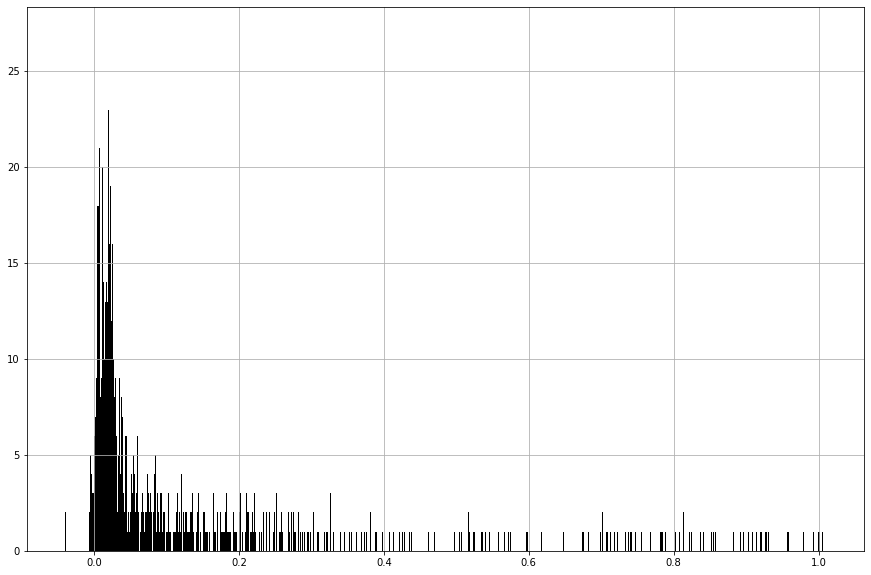

In [11]:
plt.figure(figsize = (15,10))
plt.grid()
dataset = plt.hist(histogram,bins = bins_lst,color = 'black')

## Cutting the histogram to only (-0.05, 0.1) - x axis

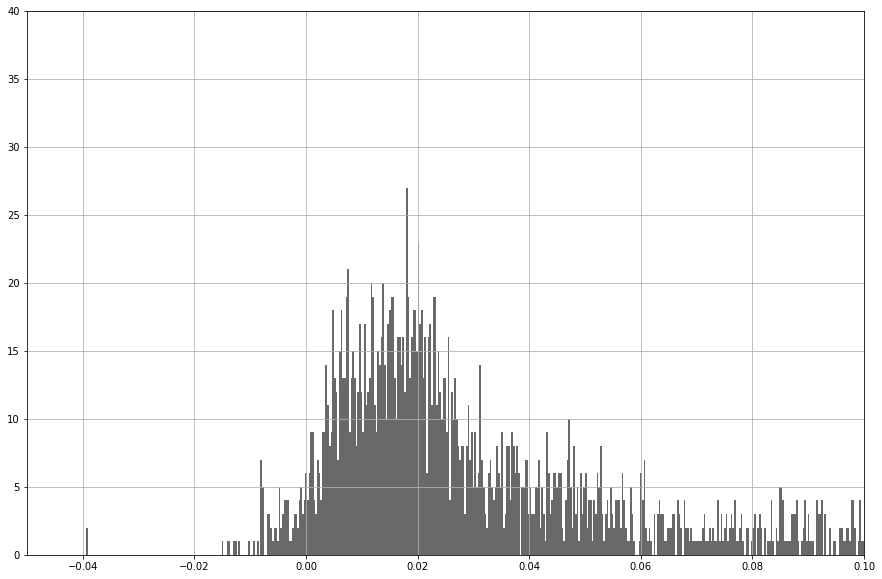

In [12]:
plt.figure(figsize = (15,10))
plt.grid()
plt.xlim(-0.05,0.1)
plt.ylim(0,40)
plt.hist(histogram,bins = bins_lst,color = 'dimgray');

## Mark the mean on the histogram (I choose the value myself)

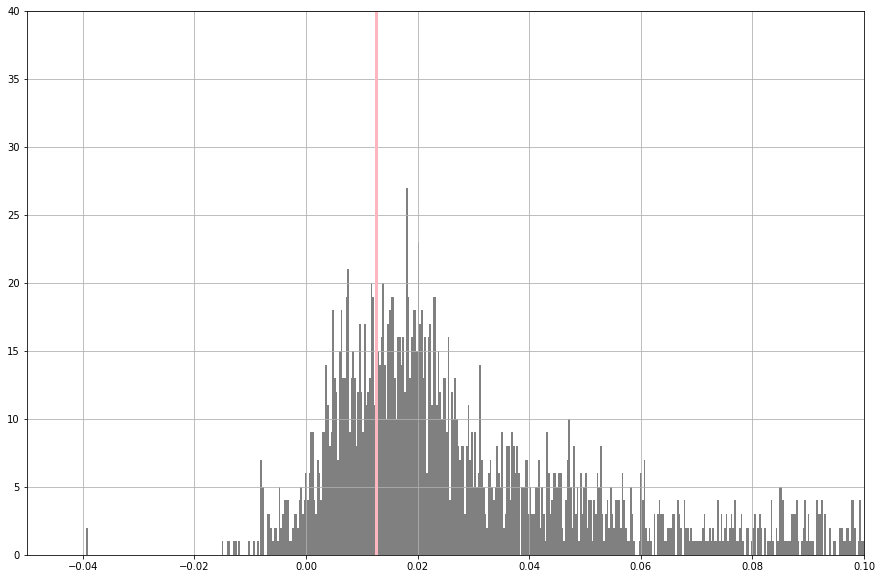

In [13]:
plt.figure(figsize = (15,10))
plt.grid()
plt.xlim(-0.05,0.1)
plt.ylim(0,40)
plt.axvline(0.0125, color = 'lightpink',linewidth = 3)
plt.hist(histogram,bins = bins_lst,color = 'gray');

## Start with peak = 0.0125 (which is the value of the pink line above)

In [14]:
#Get the length of the histogram that is left to the pink line 
index = np.where(histogram <= 0.0125)
# index

## Cut histogram to the left of the pink line

In [15]:
histogram = histogram[:index[-1][-1]]

In [16]:
len(histogram)

564

## Plot just to the left of the pink line

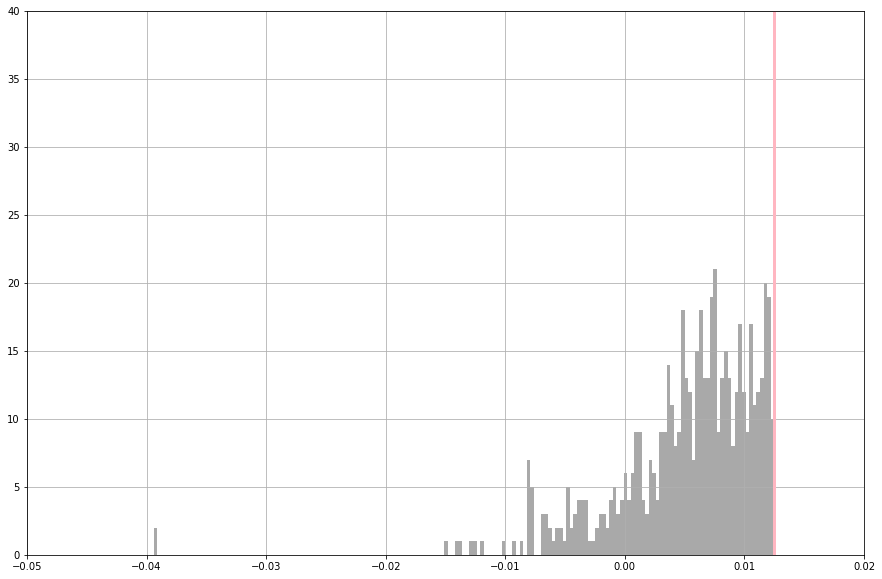

In [17]:
plt.figure(figsize = (15,10))
plt.grid()
plt.xlim(-0.05,0.02)
plt.ylim(0,40)
plt.axvline(0.0125, color = 'lightpink',linewidth = 3)
plt.hist(histogram,bins = bins_lst,color = 'darkgray');

## See dataset 

In [18]:
# y value
# for i in dataset[0]:
#     print(i)
# print(dataset[0][563])

In [19]:
# # x value
# for i in dataset[1]:
#     print(i)
# dataset[1][175]

## Try to curve_fit 

#### Get index of bin value 0.0125 from dataset[1] to get correspoding y value from dataset[0]

In [20]:
ind_of_yval = np.where(dataset[1] <= 0.0125)
ind_of_yval[-1][-1]

174

#### Make gaussian function without fixing anything

In [21]:
def gaussian(x, amp, mean, sigma):
#     mean = 0.0125 # use the pink line as the mean
#     amp = ind_of_yval[-1][-1]
#     print(mean)
    return amp * np.exp(-(x-mean)**2 / (2*sigma**2))

#### Gaussian with fixed mean 

In [22]:
def gaussian_fixed_mean(x, amp, sigma):
    mean = 0.0125 # use the pink line as the mean
#     amp = ind_of_yval[-1][-1]
#     print(mean)
    return amp * np.exp(-(x-mean)**2 / (2*sigma**2))

#### Gaussian with fixed amplitude

In [23]:
def gaussian_fixed_amp(x, mean, sigma):
#     mean = 0.0125 # use the pink line as the mean
    amp = 19
#     print(mean)
    return amp * np.exp(-(x-mean)**2 / (2*sigma**2))

#### Gaussian with fixed mean and amplitude

In [24]:
def gaussian_fixed_mean_and_amp(x, sigma):
    mean = 0.0125 # use the pink line as the mean
    amp = 19
#     print(mean)
    return amp * np.exp(-(x-mean)**2 / (2*sigma**2))

#### [IGNORE THIS PART FOR NOW] Cut the bin to match the size of the histogram array

In [25]:
# bins_lst = bins_lst[:564]

In [26]:
# bins_lst = np.array(bins_lst)
# bins_lst[-1]

#### Get the ydata from dataset[0] 


In [27]:
# ydata = dataset[0][:index[-1][-1]]
ydata = dataset[0][:ind_of_yval[-1][-1]]
ydata[-1] #amplitude that I will fix

19.0

#### Get the xdata from dataset[1]

In [28]:
xdata = dataset[1][:ind_of_yval[-1][-1]]
xdata = np.array(xdata)


# Curve_fit without initial values (p0) / bounds

### Curve_fit - Fix nothing

In [29]:
popt, pcov = curve_fit(gaussian, xdata, ydata);

#### popt - fix nothing

In [30]:
popt

array([1.46833387e+01, 1.05911770e-02, 7.64836921e-03])

### Curve_fit - Fix mean

In [31]:
popt_mean, pcov_mean = curve_fit(gaussian_fixed_mean, xdata, ydata)

#### popt - fixed mean

In [32]:
popt_mean

array([   3.18390806, 1027.933697  ])

### Curve_fit - Fix amplitude

In [33]:
popt_amp, pcov_amp = curve_fit(gaussian_fixed_amp, xdata, ydata)

#### popt - fixed amplitude

In [34]:
popt_amp

array([0.01717767, 0.01102311])

### Curve_fit - Fix both mean and amplitude

In [35]:
popt_both, pcov_both = curve_fit(gaussian_fixed_mean_and_amp, xdata, ydata)

#### popt - fixed both mean and amplitude

In [36]:
popt_both

array([-0.00764357])

## Plotting the histogram without the initial value (p0) / bounds

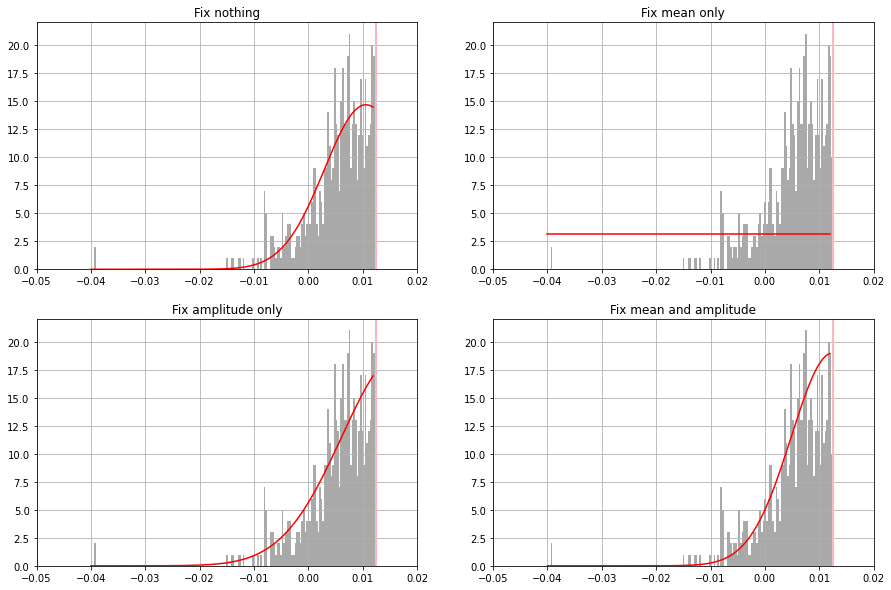

In [37]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2,figsize = (15,10))
ax1.grid()
ax1.hist(histogram,bins = bins_lst,color = 'darkgray');
ax1.axvline(0.0125, color = 'lightpink',linewidth = 2)
ax1.plot(xdata,gaussian(xdata,popt[0],popt[1],popt[2]), color = 'red');
ax1.set_xlim(-0.05,0.02)
ax1.set_title('Fix nothing');

ax2.grid()
ax2.hist(histogram,bins = bins_lst,color = 'darkgray');
ax2.axvline(0.0125, color = 'lightpink',linewidth = 2)
ax2.plot(xdata,gaussian_fixed_mean(xdata,popt_mean[0],popt_mean[1]), color = 'red');
ax2.set_xlim(-0.05,0.02)
ax2.set_title('Fix mean only');

ax3.grid()
ax3.hist(histogram,bins = bins_lst,color = 'darkgray');
ax3.axvline(0.0125, color = 'lightpink',linewidth = 2)
ax3.plot(xdata,gaussian_fixed_amp(xdata,popt_amp[0],popt_amp[1]), color = 'red');
ax3.set_xlim(-0.05,0.02)
ax3.set_title('Fix amplitude only');

ax4.grid()
ax4.hist(histogram,bins = bins_lst,color = 'darkgray');
ax4.axvline(0.0125, color = 'lightpink',linewidth = 2)
ax4.plot(xdata,gaussian_fixed_mean_and_amp(xdata,popt_both[0]), color = 'red');
ax4.set_xlim(-0.05,0.02)
ax4.set_title('Fix mean and amplitude');

In [38]:
# plt.figure(figsize = (15,10))
# plt.grid()
# # plt.hist(histogram,bins = bins_lst,color = 'darkgray');
# # plt.axvline(0.0125, color = 'lightpink',linewidth = 2)
# plt.plot(xdata,gaussian_fixed_mean(xdata,popt_mean[0],popt_mean[1]), color = 'red');
# plt.xlim(-0.05,0.02)
# plt.title('Fix mean only');

# Curve_fit with initial values (p0)

#### Curve_fit - fix nothing / with initial values

In [39]:
popt_p0 , pcov_p0 = curve_fit(gaussian, xdata, ydata, p0 = [16.5, 0.0125, 0.008])

# same result as without the initial values

#### popt - fixed nothing / with initial values

In [40]:
popt_p0, popt

(array([1.46833541e+01, 1.05912511e-02, 7.64842999e-03]),
 array([1.46833387e+01, 1.05911770e-02, 7.64836921e-03]))

#### Curve_fit - fix mean / with initial values

In [41]:
popt_mean_p0, pcov_mean_p0 = curve_fit(gaussian_fixed_mean, xdata, ydata, p0 = [16.5, 0.008])

# different result as without the initial values

#### popt - fixed mean / with initial values 

In [42]:
popt_mean_p0, popt_mean

(array([1.54888298e+01, 8.83298755e-03]),
 array([   3.18390806, 1027.933697  ]))

#### Curve_fit - fix amplitude / with initial values 

In [43]:
popt_amp_p0, pcov_amp_p0 = curve_fit(gaussian_fixed_amp, xdata, ydata, p0 = [0.0125, 0.008])

# very small difference as without the initial values

#### popt - fixed amplitude / with initial values

In [44]:
popt_amp_p0, popt_amp

(array([0.01717759, 0.01102306]), array([0.01717767, 0.01102311]))

#### Curve_fit - fix both mean and amplitude / with initial values

In [45]:
popt_both_p0, pcov_both_p0 = curve_fit(gaussian_fixed_mean_and_amp, xdata, ydata, p0 = [0.008])

# almost same value (well, to say they are same wouldn't really be wrong), but positive

#### popt - fixed both mean and amplitude / with initial values

In [46]:
popt_both_p0, popt_both

(array([0.00764356]), array([-0.00764357]))

## Plotting the histogram with initial values (p0)

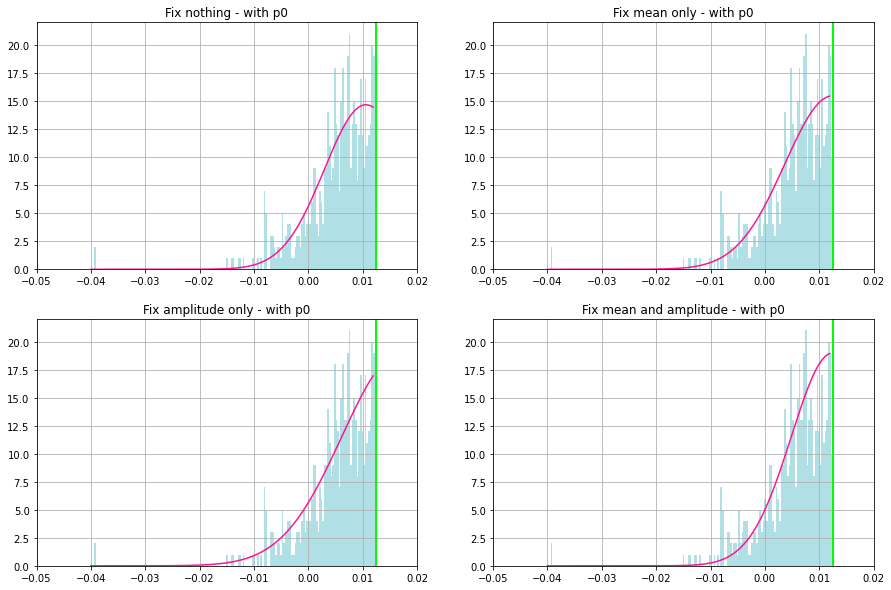

In [47]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2,figsize = (15,10))
ax1.grid()
ax1.hist(histogram,bins = bins_lst,color = 'powderblue');
ax1.axvline(0.0125, color = 'lime',linewidth = 2)
ax1.plot(xdata,gaussian(xdata,popt_p0[0],popt_p0[1],popt_p0[2]), color = 'deeppink');
ax1.set_xlim(-0.05,0.02)
ax1.set_title('Fix nothing - with p0');

ax2.grid()
ax2.hist(histogram,bins = bins_lst,color = 'powderblue');
ax2.axvline(0.0125, color = 'lime',linewidth = 2)
ax2.plot(xdata,gaussian_fixed_mean(xdata,popt_mean_p0[0],popt_mean_p0[1]), color = 'deeppink');
ax2.set_xlim(-0.05,0.02)
ax2.set_title('Fix mean only - with p0');

ax3.grid()
ax3.hist(histogram,bins = bins_lst,color = 'powderblue');
ax3.axvline(0.0125, color = 'lime',linewidth = 2)
ax3.plot(xdata,gaussian_fixed_amp(xdata,popt_amp_p0[0],popt_amp_p0[1]), color = 'deeppink');
ax3.set_xlim(-0.05,0.02)
ax3.set_title('Fix amplitude only - with p0');

ax4.grid()
ax4.hist(histogram,bins = bins_lst,color = 'powderblue');
ax4.axvline(0.0125, color = 'lime',linewidth = 2)
ax4.plot(xdata,gaussian_fixed_mean_and_amp(xdata,popt_both_p0[0]), color = 'deeppink');
ax4.set_xlim(-0.05,0.02)
ax4.set_title('Fix mean and amplitude - with p0');

## Summary of sigma values

In [48]:
print('sigma - fix nothing / without p0 = ', popt[-1])
print('sigma - fixed nothing / with p0 = ', popt_p0[-1])
print()
print('sigma - fix mean / wihtout p0 = ', popt_mean[-1])
print('sigma - fix mean / with p0 = ', popt_mean_p0[-1])
print()
print('sigma - fix amplitude / without p0 = ', popt_amp[-1])
print('sigma - fix amplitude / with p0 = ', popt_amp_p0[-1])
print()
print('sigma - fix both mean and amplitude / without p0 = ', popt_both[-1])
print('sigma - fix both mean and amplitude / with p0 = ', popt_both_p0[-1])

sigma - fix nothing / without p0 =  0.0076483692122702295
sigma - fixed nothing / with p0 =  0.007648429992534714

sigma - fix mean / wihtout p0 =  1027.933696996063
sigma - fix mean / with p0 =  0.008832987547385995

sigma - fix amplitude / without p0 =  0.011023107749801085
sigma - fix amplitude / with p0 =  0.011023061344520824

sigma - fix both mean and amplitude / without p0 =  -0.007643571363867751
sigma - fix both mean and amplitude / with p0 =  0.007643564329295106


## Getting the data from IVAR to compare

In [49]:
var_data = np.array(variance[:,:,2709]).flatten()

In [50]:
# Then what ? I don't understand this file =.=
# Do I sqrt and sum the variance at 2709 and divide 5776 ? 
# Lemme try that eieiei

In [51]:
summation = (np.sqrt(var_data)).sum()
answer = summation / 5776
answer, math.sqrt(answer)

# Maybe this is not the way to do it hehehe.
# ABORTTTT !!!! 

(66.11658154432133, 8.131210336986822)

## Plotting the data as 2D image


#### Making the mask array 

In [52]:
do_not_use = (mask & 2**10) != 0
flux_m = np.ma.array(flux, mask=do_not_use)

#### Get drpall file

In [53]:
drpall = fits.open('/Users/natachaupra/Downloads/drpall-v2_4_3.fits')

In [54]:
tbdata = drpall[1].data

#### Get redshift index and redshift value

In [55]:
zindex = np.where(tbdata['mangaid'] == '1-210866')

In [56]:
zindex[0][0]

41

In [57]:
redshift = tbdata['nsa_z'][zindex[0][0]]

In [58]:
ind_wave = 2709

In [59]:
wave[2709]

6757.716993552864

#### Trying to plot the 2D image 

In [60]:
halpha = flux_m[:, :, ind_wave]
im = halpha.T

In [61]:
flux_header = data['FLUX'].header

In [62]:
x_center = int(flux_header['CRPIX1']) - 1
y_center = int(flux_header['CRPIX2']) - 1

In [63]:
# Convert from array indices to arcsec relative to IFU center
dx = flux_header['CD1_1'] * 3600.  # deg to arcsec
dy = flux_header['CD2_2'] * 3600.  # deg to arcsec

x_extent = (np.array([0., im.shape[0]]) - (im.shape[0] - x_center)) * dx * (-1)
y_extent = (np.array([0., im.shape[1]]) - (im.shape[1] - y_center)) * dy
extent = [x_extent[0], x_extent[1], y_extent[0], y_extent[1]]

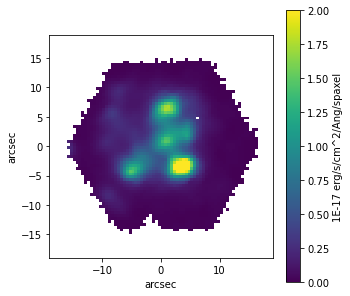

In [64]:
plt.figure(figsize = (5,5))
plt.imshow(im, extent=extent, cmap=cm.viridis, vmin=0, vmax=2, origin='lower', interpolation='none');
plt.colorbar(label=flux_header['BUNIT']) #specific intensity per spaxel
plt.xlabel('arcsec')
plt.ylabel('arcsec')
plt.show()

In [65]:
xnum = np.array([[x]*76 for x in range(76)]).flatten()
ynum = np.array((list(range(76))*76))
imagedata = np.array(flux[:,:,2709]).flatten()
len(xnum)

5776

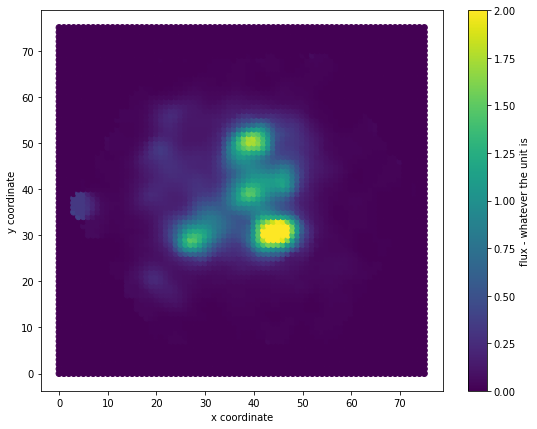

In [66]:
plt.figure(figsize = (9,7))
plt.scatter(xnum,ynum,c=imagedata,cmap=cm.viridis)
plt.colorbar(label = 'flux - whatever the unit is')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
#actual auto scale was (0,3) - there is data up to 3
plt.clim(0,2)

plt.show()

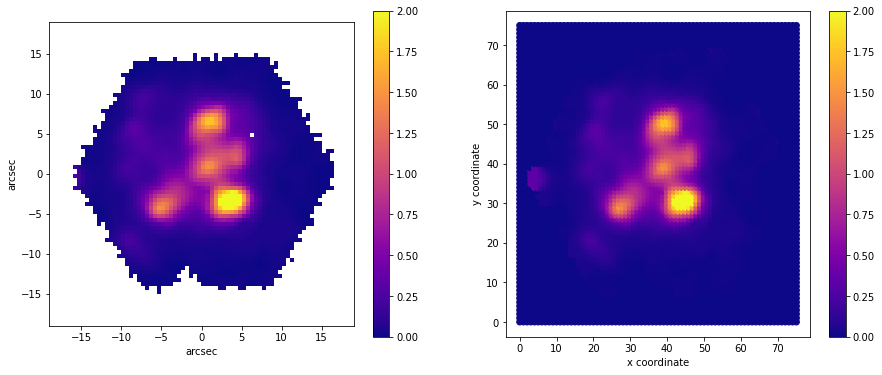

In [67]:
fig, (cmp1, cmp2) = plt.subplots(1,2,figsize=(15,6))
imshow1 = cmp1.imshow(im, extent=extent, cmap=cm.plasma, vmin=0, vmax=2, origin='lower', interpolation='none');
# cmp1.colorbar(label=flux_header['BUNIT'])
cmp1.set_xlabel('arcsec')
cmp1.set_ylabel('arcsec')
plt.colorbar(imshow1, ax = cmp1)
# cmp1.show()

scat = cmp2.scatter(xnum,ynum,c=imagedata,cmap=cm.plasma,vmin=0,vmax=2)
# cmp2.colorbar(label = 'flux - whatever the unit is')
cmp2.set_xlabel('x coordinate');
cmp2.set_ylabel('y coordinate');
plt.colorbar(scat, ax = cmp2)
# cmp2.pcolor(vmin= 0 , vmax = 0.5)
#actual auto scale was (0,3) - there is data up to 3
# cmp2.clim(0,0.5)
# cmp2.show()